In [1]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

data = pd.read_csv("./data_filtered.csv")

In [25]:
X = data[['author', 'difficulty', 'category', 'event_points']]
y = data['users_solved']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical features for CatBoost
cat_features = ['author', 'category']

# Initialize CatBoost model with optimized hyperparameters
model = CatBoostRegressor(
    cat_features=cat_features,
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=3,
    random_seed=42,
    verbose=1
)

# Optional: Log-transform target to handle skewness
from sklearn.compose import TransformedTargetRegressor
tt_model = TransformedTargetRegressor(
    regressor=model,
    func=np.log1p,
    inverse_func=np.expm1
)

# Fit the model
tt_model.fit(X_train, y_train)


#
# Predict and evaluate
y_pred = tt_model.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')
print(f'R²: {r2_score(y_test, y_pred):.2f}')


0:	learn: 1.7052897	total: 2.22ms	remaining: 2.22s
1:	learn: 1.6556357	total: 3.99ms	remaining: 1.99s
2:	learn: 1.6125682	total: 5.49ms	remaining: 1.82s
3:	learn: 1.5730674	total: 6.58ms	remaining: 1.64s
4:	learn: 1.5299104	total: 7.97ms	remaining: 1.59s
5:	learn: 1.4889096	total: 8.92ms	remaining: 1.48s
6:	learn: 1.4558220	total: 9.88ms	remaining: 1.4s
7:	learn: 1.4186065	total: 10.8ms	remaining: 1.34s
8:	learn: 1.3867153	total: 11.8ms	remaining: 1.3s
9:	learn: 1.3583361	total: 12.6ms	remaining: 1.25s
10:	learn: 1.3277375	total: 13.8ms	remaining: 1.24s
11:	learn: 1.3025000	total: 15.1ms	remaining: 1.24s
12:	learn: 1.2751983	total: 16.3ms	remaining: 1.24s
13:	learn: 1.2498834	total: 17.6ms	remaining: 1.24s
14:	learn: 1.2281876	total: 18.1ms	remaining: 1.19s
15:	learn: 1.2049636	total: 18.9ms	remaining: 1.16s
16:	learn: 1.1861864	total: 19.9ms	remaining: 1.15s
17:	learn: 1.1660063	total: 21ms	remaining: 1.15s
18:	learn: 1.1478340	total: 21.9ms	remaining: 1.13s
19:	learn: 1.1337240	total

In [5]:
## Feature Importance
# After training the model (tt_model.fit(...))
feature_importance = tt_model.regressor_.get_feature_importance()

# Map feature importance to feature names
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

        Feature  Importance
1    difficulty   34.853898
3  event_points   24.247818
0        author   20.577879
2      category   20.320405


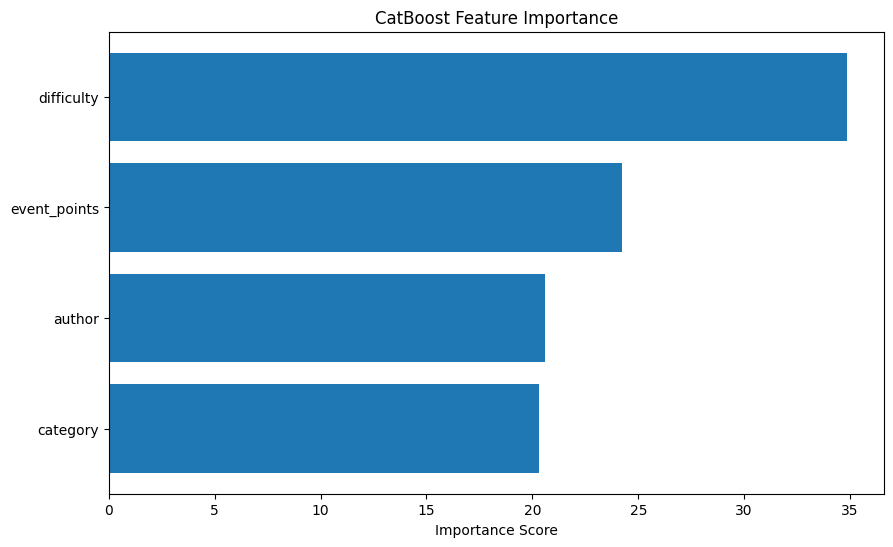

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()  # Show most important at the top
plt.show()

In [24]:
custom_data = pd.DataFrame({
    'author': ['notdeghost', 'asinghani', 'John Hammond'],
    'difficulty': [3, 3, 2],
    'category': ['Binary Exploitation', 'Cryptography', 'Web Exploitation'],
    'event_points': [500, 200, 400]
})

# Predict
predictions = tt_model.predict(custom_data)
custom_data['predicted_users_solved'] = np.round(predictions).astype(int)

# Display results
print("\nCustom Input Predictions:")
print(custom_data[['author', 'difficulty', 'category', 'event_points', 'predicted_users_solved']])


Custom Input Predictions:
         author  difficulty             category  event_points  \
0    notdeghost           3  Binary Exploitation           500   
1     asinghani           3         Cryptography           200   
2  John Hammond           2     Web Exploitation           400   

   predicted_users_solved  
0                      22  
1                     680  
2                    6905  


In [27]:
## Save full pipeline
import joblib
joblib.dump(tt_model, '../model/model_pipeline.pkl')


['../model/model_pipeline.pkl']